In [40]:
#import os
#os.environ ['KAGGLE_CONFIG_DIR']= '/content'

In [41]:
#!kaggle datasets download -d msambare/fer2013

In [42]:
#!unzip \*.zip && rm *.zip


# importing_library

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import cv2
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
import glob
import glob as gb
from sklearn import preprocessing
from matplotlib import pyplot as plt
import plotly.express as px
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
from sklearn import  metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
%matplotlib inline


### functions_to plot the predictions

In [44]:
class_names = sorted(os.listdir('/content/test'))

In [45]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="black")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('blue')
  thisplot[true_label].set_color('red')

In [46]:
def plot_image(i, predictions_array, true_label, img):

  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])


  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

## loading _train_test and preprocessing

# Resizing_train_test

In [47]:
import os
import glob
import cv2

size = 48
folder_path = '/content/train'
folders = sorted(os.listdir(folder_path))

xt_img = []
yt_img = []

for folder in folders:
    folder_name = folder.split("\\")[-1]
    print(folder_name)

    folder_images = glob.glob(os.path.join(folder_path, folder, "*.jpg"))
    for img in folder_images:
        print(img)
        im = cv2.imread(img, cv2.IMREAD_COLOR)
        im = cv2.resize(im, (size, size))
        xt_img.append(im)
        yt_img.append(folder_name)


Streaming output truncated to the last 5000 lines.
/content/train/sad/Training_10204058.jpg
/content/train/sad/Training_43014753.jpg
/content/train/sad/Training_23298768.jpg
/content/train/sad/Training_40914926.jpg
/content/train/sad/Training_35587844.jpg
/content/train/sad/Training_66816897.jpg
/content/train/sad/Training_18744966.jpg
/content/train/sad/Training_93851059.jpg
/content/train/sad/Training_81634692.jpg
/content/train/sad/Training_34325221.jpg
/content/train/sad/Training_78306602.jpg
/content/train/sad/Training_56533939.jpg
/content/train/sad/Training_13716815.jpg
/content/train/sad/Training_17101752.jpg
/content/train/sad/Training_94805024.jpg
/content/train/sad/Training_839096.jpg
/content/train/sad/Training_23547648.jpg
/content/train/sad/Training_89165778.jpg
/content/train/sad/Training_33971696.jpg
/content/train/sad/Training_57915797.jpg
/content/train/sad/Training_6977677.jpg
/content/train/sad/Training_29712737.jpg
/content/train/sad/Training_19103156.jpg
/content/

In [48]:
import os
import glob
import cv2

size = 48
folder_path = '/content/test'
folders = sorted(os.listdir(folder_path))

xte_img = []
yte_img = []

for folder in folders:
    folder_name = folder.split("\\")[-1]
    print(folder_name)

    folder_images = glob.glob(os.path.join(folder_path, folder, "*.jpg"))
    for img in folder_images:
        print(img)
        im = cv2.imread(img, cv2.IMREAD_COLOR)
        im = cv2.resize(im, (size, size))
        xte_img.append(im)
        yte_img.append(folder_name)


Streaming output truncated to the last 5000 lines.
/content/test/happy/PrivateTest_62208309.jpg
/content/test/happy/PublicTest_30543773.jpg
/content/test/happy/PrivateTest_33571817.jpg
/content/test/happy/PublicTest_33738386.jpg
/content/test/happy/PublicTest_13156241.jpg
/content/test/happy/PrivateTest_68708045.jpg
/content/test/happy/PrivateTest_5841098.jpg
/content/test/happy/PrivateTest_64512674.jpg
/content/test/happy/PublicTest_35396194.jpg
/content/test/happy/PublicTest_6949642.jpg
/content/test/happy/PrivateTest_33232827.jpg
/content/test/happy/PrivateTest_66551790.jpg
/content/test/happy/PublicTest_30185681.jpg
/content/test/happy/PrivateTest_20032914.jpg
/content/test/happy/PublicTest_91510448.jpg
/content/test/happy/PublicTest_65309766.jpg
/content/test/happy/PublicTest_3299093.jpg
/content/test/happy/PublicTest_8121981.jpg
/content/test/happy/PrivateTest_36802733.jpg
/content/test/happy/PrivateTest_14103671.jpg
/content/test/happy/PublicTest_51392628.jpg
/content/test/happy

##image_to_array

In [49]:
xt_img=np.array(xt_img)
yt_img=np.array(yt_img)
xte_img=np.array(xte_img)
yte_img=np.array(yte_img)

In [50]:
print(xt_img.shape)
print(xte_img.shape)

(28709, 48, 48, 3)
(7178, 48, 48, 3)


##Encoding_mylabel

In [51]:
le=preprocessing.LabelEncoder()
le.fit(yt_img)
y=le.transform(yt_img)
le.fit(yte_img)
ye=le.transform(yte_img)

##Exploring _dataset

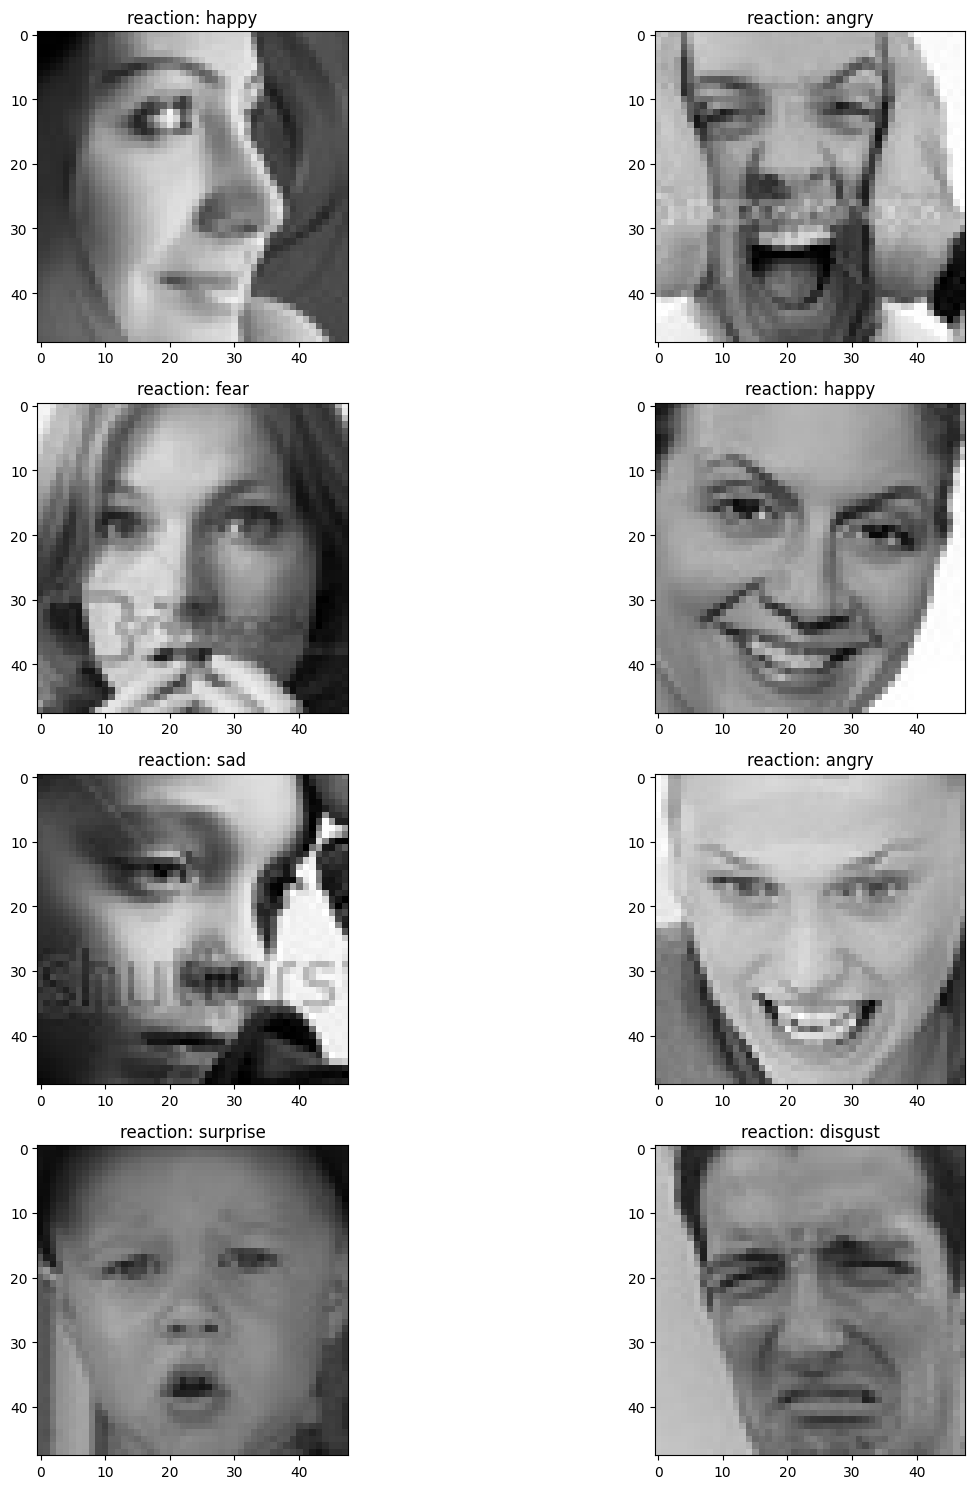

In [52]:
import random as rn
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range(2):
        l=rn.randint(0,len(xt_img)-1)
        ax[i,j].imshow(xt_img[l],cmap='gray')
        ax[i,j].set_title('reaction: '+yt_img[l])
plt.tight_layout()

## preparing_train_test to model

In [53]:
x_train,y_train,x_test,y_test=xt_img,y,xte_img,ye

##Rescaling_images

In [54]:
x_train=x_train/255.0
x_test=x_test/255.0

In [55]:
print(x_train.shape)
print(x_test.shape)

(28709, 48, 48, 3)
(7178, 48, 48, 3)


##image to reshape and expanding to train andd test

In [56]:
image_features=x_train
image_features=np.expand_dims(x_train,axis=0)
image_features.shape
print(image_features.shape)
X=np.reshape(image_features,(x_train.shape[0],-1))
print(X.shape)

(1, 28709, 48, 48, 3)
(28709, 6912)


In [57]:
test_features=x_test
test_features=np.expand_dims(test_features,axis=0)
print(test_features.shape)
Xp=np.reshape(test_features,(x_test.shape[0],-1))
print(Xp.shape)

(1, 7178, 48, 48, 3)
(7178, 6912)


#ANN MODEL

In [58]:
mo = keras.models.Sequential()
mo.add(keras.layers.Flatten(input_shape=(6912,)))
mo.add(keras.layers.Dense(512, activation='relu'))
mo.add(keras.layers.Dense(256, activation='relu'))
mo.add(keras.layers.Dense(128, activation='relu'))
mo.add(keras.layers.Dense(128, activation='relu'))
mo.add(keras.layers.Dense(7, activation='softmax'))

##compiling

In [59]:
mo.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#Fitting

In [60]:

history=mo.fit(X, y_train, epochs=65,batch_size=128)

Epoch 1/65
225/225 [==============================] - 3s 8ms/step - loss: 1.8234 - accuracy: 0.2603
Epoch 2/65
225/225 [==============================] - 2s 8ms/step - loss: 1.7154 - accuracy: 0.3194
Epoch 3/65
225/225 [==============================] - 1s 6ms/step - loss: 1.6790 - accuracy: 0.3412
Epoch 4/65
225/225 [==============================] - 1s 6ms/step - loss: 1.6600 - accuracy: 0.3455
Epoch 5/65
225/225 [==============================] - 1s 5ms/step - loss: 1.6386 - accuracy: 0.3578
Epoch 6/65
225/225 [==============================] - 1s 6ms/step - loss: 1.6196 - accuracy: 0.3664
Epoch 7/65
225/225 [==============================] - 1s 6ms/step - loss: 1.6030 - accuracy: 0.3720
Epoch 8/65
225/225 [==============================] - 1s 6ms/step - loss: 1.5939 - accuracy: 0.3780
Epoch 9/65
225/225 [==============================] - 2s 9ms/step - loss: 1.5751 - accuracy: 0.3854
Epoch 10/65
225/225 [==============================] - 3s 13ms/step - loss: 1.5737 - accuracy: 0.385

#show fig train_accuracy_loss

In [61]:
plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
train_acc = history.history['accuracy']
epoch = range(1, 66)

loss = pd.DataFrame({'train_loss' : train_loss, 'train_acc' :train_acc})

px.line(data_frame = loss, x = epoch, y = ['train_acc', 'train_loss'], title = 'Training accuracy and Loss',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>

#testing_accurcy

In [62]:
loss,acc=mo.evaluate(Xp, y_test)

225/225 [==============================] - 1s 4ms/step - loss: 2.3062 - accuracy: 0.4075


##predictions

In [63]:

predictions = mo.predict(Xp)
print(predictions)

225/225 [==============================] - 1s 2ms/step
[[6.1150314e-04 4.1912777e-08 3.8600128e-02 ... 1.6689910e-05
  1.0422254e-04 9.6041429e-01]
 [5.3905183e-01 1.4999488e-02 1.3654573e-01 ... 4.8436005e-02
  8.6905330e-02 3.1841453e-02]
 [1.3661554e-01 3.7223908e-05 4.3671125e-01 ... 7.9695411e-02
  6.8476960e-02 1.7487167e-01]
 ...
 [2.3077407e-01 2.4759450e-07 2.3209460e-01 ... 6.0025752e-02
  9.7830750e-02 3.7914619e-01]
 [1.0872036e-02 3.4191457e-06 5.4366505e-01 ... 1.7901400e-01
  3.8807411e-02 2.2546124e-01]
 [8.1490045e-03 1.2195468e-06 9.7118951e-02 ... 9.7057782e-04
  1.5003667e-03 8.8855100e-01]]


##Saving_model

In [64]:
mo.save("/content/drive/MyDrive/Colab Notebooks/finalprojectmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



##making_report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.29      0.30      0.29       958
           1       0.27      0.33      0.30       111
           2       0.28      0.35      0.32      1024
           3       0.56      0.61      0.58      1774
           4       0.35      0.34      0.35      1233
           5       0.36      0.25      0.30      1247
           6       0.55      0.52      0.53       831

    accuracy                           0.41      7178
   macro avg       0.38      0.39      0.38      7178
weighted avg       0.41      0.41      0.40      7178


##confusion matrix TP-TN

accuracy of the model:  0.4074951112270355


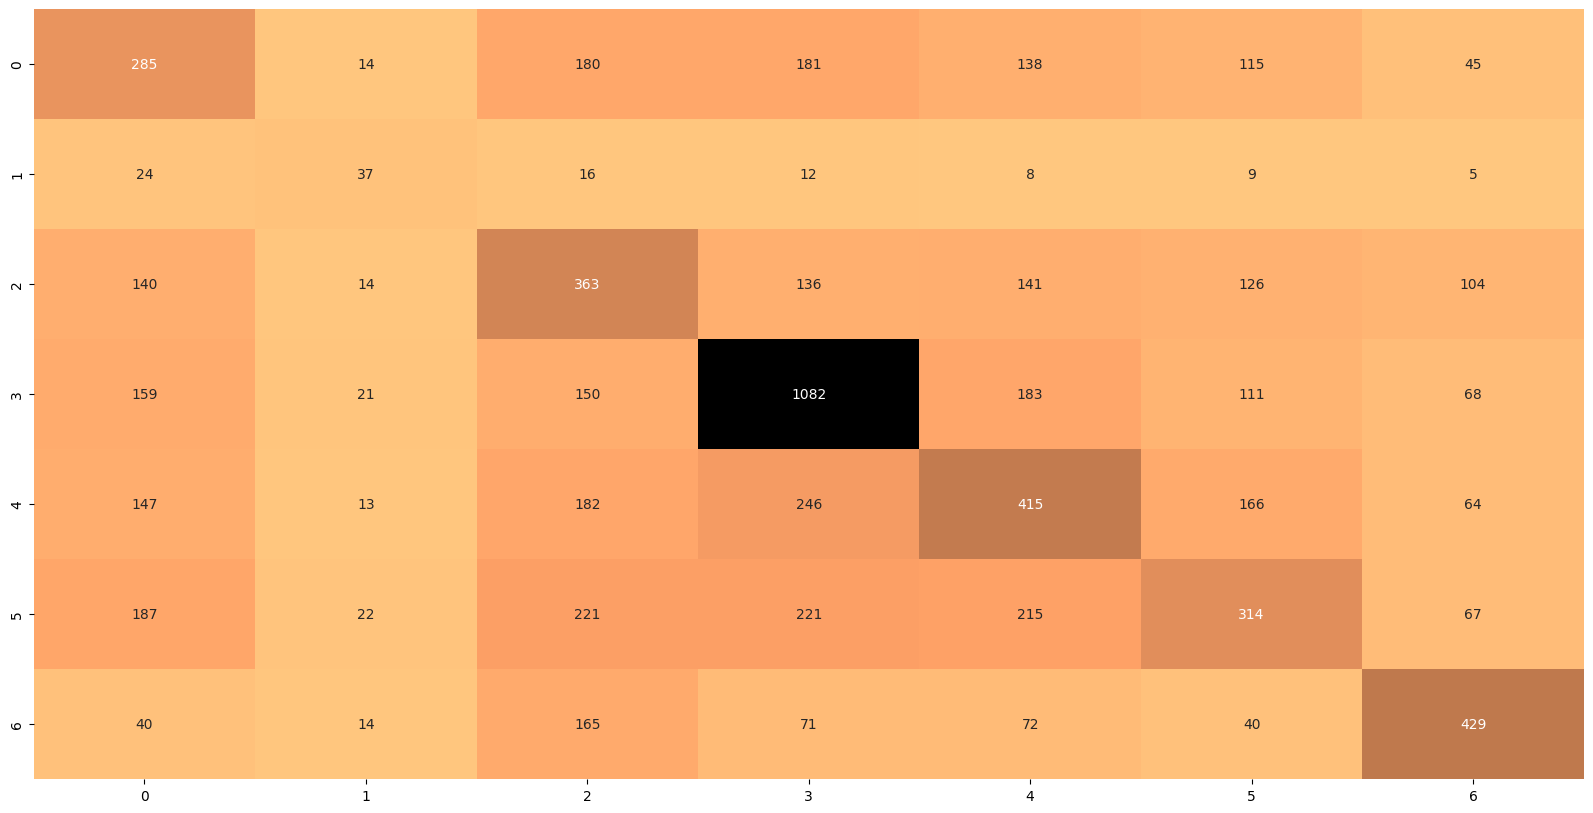

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig,ax=plt.subplots(figsize=(20,10))
cm = confusion_matrix(y_test, np.argmax(predictions, axis=1))
sns.heatmap(cm,annot=True,cmap="copper_r",fmt="d",cbar=False,ax=ax)
print('accuracy of the model: ',acc)

##ROC-CURVE,FP-TP AND AUC

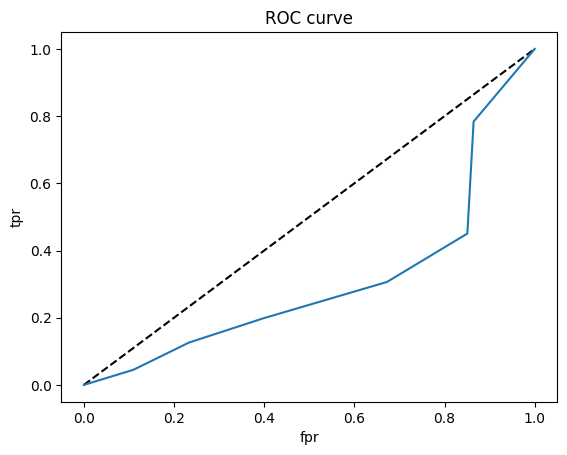

In [67]:

fpr, tpr, thresholds = roc_curve(y_test,np.argmax(predictions, axis=1),pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [68]:

roc_auc_score(y_test,predictions,multi_class='ovo')

0.7381168724908695

##Showing predictions to some examples and using plotin functions

['happy']


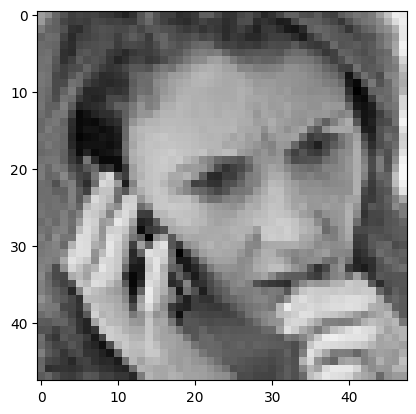

In [69]:
i = np.random.randint(0,x_test.shape[0]-1)
import numpy as np
mo=np.argmax(predictions[i])
mo=le.inverse_transform([mo])
print(mo)
plt.imshow(x_test[i],cmap=plt.cm.binary)
plt.show()

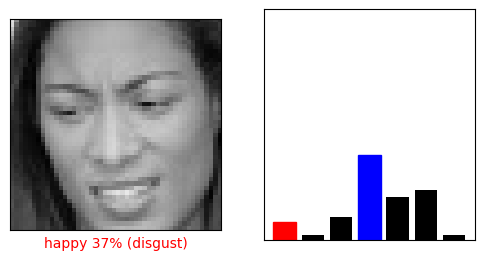

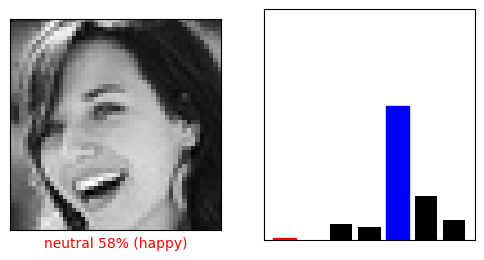

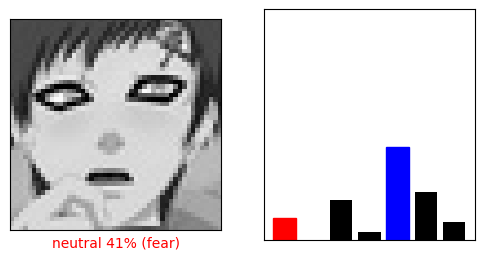

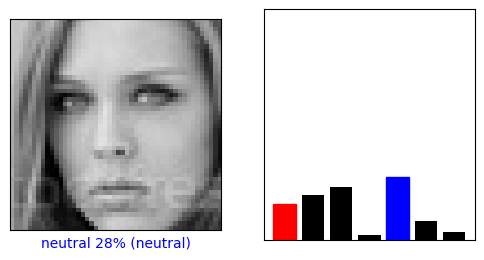

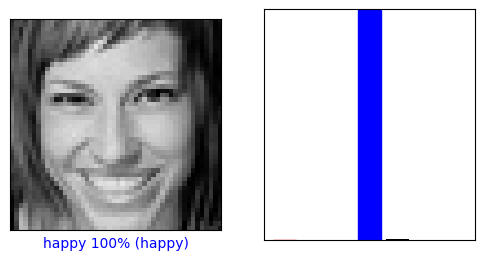

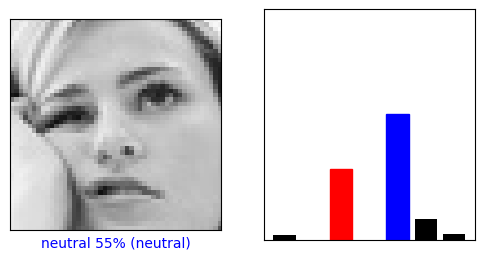

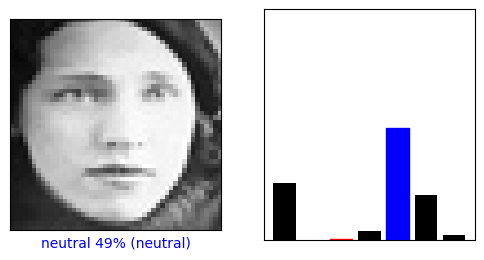

In [70]:
for i in range(7):
  i = np.random.randint(0,x_test.shape[0]-1)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, y_test, xte_img)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  y)
  plt.show()

#Loading model-and use it again

In [71]:
new_model=keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/finalprojectmodel.h5")
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 6912)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               3539456   
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 7)                 903       
                                                                 
Total params: 3721095 (14.19 MB)
Trainable params: 372

In [72]:
import cv2
img='/content/test/happy/PrivateTest_10736786.jpg'
im=cv2.imread(img,cv2.IMREAD_COLOR)
im=cv2.resize(im,(48,48))

In [73]:
im=np.array(im)
im=im/255.0


In [74]:
test_fea=im
test_fea=np.expand_dims(test_fea,axis=0)
print(test_fea.shape)
c=np.reshape(test_fea,(1,-1))
print(c.shape)

(1, 48, 48, 3)
(1, 6912)


In [75]:
p=new_model.predict(c)

1/1 [==============================] - 0s 61ms/step


In [76]:

p

array([[0.11395817, 0.01178894, 0.44941694, 0.1597136 , 0.05910477,
        0.0944263 , 0.11159137]], dtype=float32)

['fear']


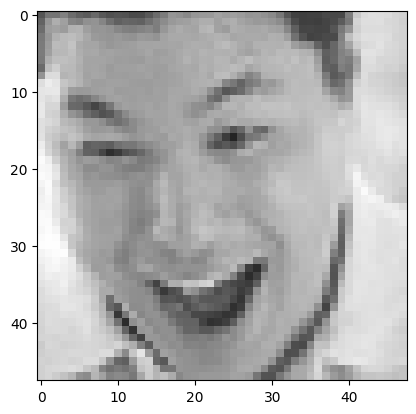

In [77]:
import numpy as np
mo=np.argmax(p)
mo=le.inverse_transform([mo])
print(mo)
plt.imshow(im,cmap=plt.cm.binary)
plt.show()